## Team ID = PTID-CDS-JAN 22 -1273 
### Project ID = PRCP-1017-AutoPricePred
#### Problem Statement = Predict Price of the Car

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("auto_imports.csv")

In [3]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
df = pd.read_csv("auto_imports.csv", na_values = ['?'],header=0,names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinder','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'])

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [6]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [7]:
type(df['fuel-type'])

pandas.core.series.Series

### Exploratory Data Analysis

#### Description of Variables-:
1. symboling - A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe
2. normalized-losses - scale is 65-256, so higher the risk then higher the normilized lossess.
3. make - Brands of the Cars
4. fuel-type - Type of fuels used by cars
5. aspiration - Air take for Combustion, usually sport cars use normalized atmosphere air to avoid lag of foced air by turbo
6. num-of-doors - Number of doors of the cars
7. body-style - Body Style of the car made,
8. drive-wheels - which weels are connected to engine transmission.
9. engine-location - location of the engine
10. wheel-base - The distance between front wheel axis to rear wheel axis 
11. length - center distance between the front and the rear axle of the vehicle
12. width - Width of the car.
13. height - Height of the Car.
14. curb-weight - Total Weight of the car without adding any weights to car.
15. engine-type - Type of Engine.
16. num-of-cylinder - Number of Cylinders that are counters with Engine Design.
17. engine-size - Size of the Engine
18. fuel-system - Sytstem used for fuel inlet to Engine.
19. bore - Dimension of Piston Diameter.
20. stroke - Dimension of Piston Length.
21. compression-ratio -  CR is the degree to which the fuel-air mixture is compressed before being ignited.
22. horsepower - it is a unit of measurement of power, or the rate at which work is done, usually in reference to the output of engines
23. peak-rpm -  it is just one point on the power band of the engine.
24. city-mpg - City Milage in Miles Per Gallon
25. highway-mpg - Highway Mileage in Miles per Gallon
26. price - Price of the Car

###### Check for the count of nan values

In [8]:
df.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinder       0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       198 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinder    200 non-null    object 
 16  engine-size        200 non

#### In this dataset we are having some outliers in some columns. So we remove outliers by imputation of median and mode.

##### Data cleaning

<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

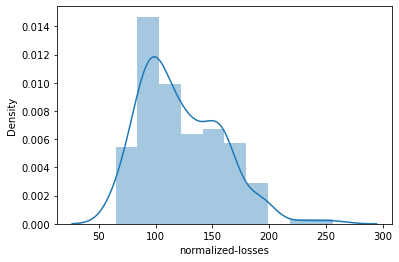

In [10]:
sns.distplot(df["normalized-losses"])

In [11]:
df["normalized-losses"]=df["normalized-losses"].fillna(df["normalized-losses"].median())

<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

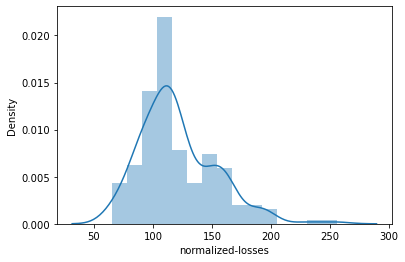

In [12]:
sns.distplot(df["normalized-losses"])

In [13]:
df['num-of-doors']= df['num-of-doors'].fillna(method="bfill")
df['bore']= df['bore'].fillna(df['bore'].median())
df['stroke']=df['stroke'].fillna(df['stroke'].median())
df['horsepower']= df['horsepower'].fillna(df['horsepower'].median())
df['peak-rpm']= df['peak-rpm'].fillna(df['peak-rpm'].median())

<Figure size 720x1080 with 0 Axes>

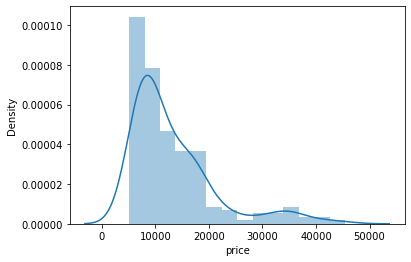

<Figure size 720x1080 with 0 Axes>

In [14]:
sns.distplot(df.price)
plt.figure(figsize=(10,15))

##### The distribution of the dependant variable is Right Skewed

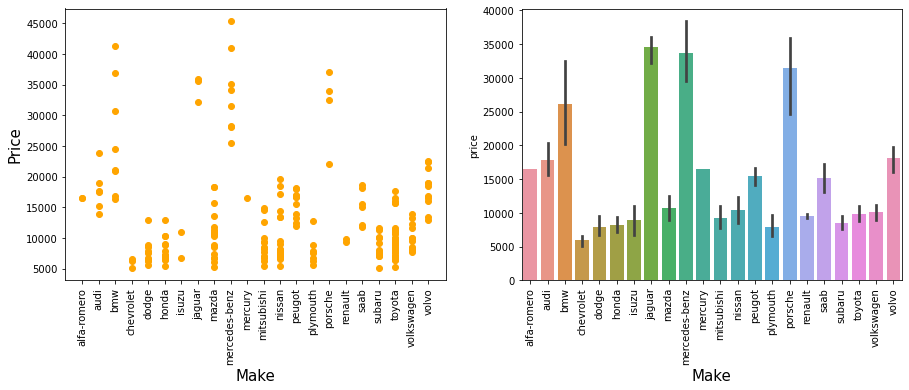

In [15]:
#visually inspecting Dependent Variable-Price

fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(df["make"],df["price"],color="orange")
plt.xticks(rotation=90)
plt.xlabel("Make",fontsize=15)
plt.ylabel("Price",fontsize=15)

plt.subplot(1,2,2)
sns.barplot(x="make",y="price",data=df)
plt.xlabel("Make",fontsize=15)

plt.xticks(rotation=90)
plt.show()

###### In this barplot we are abe to vizualize the make(brands of car ) and their respective price.The top four brands based on its prices are 'Mercedes-benz','Jaguar','Porsche','Bmw'

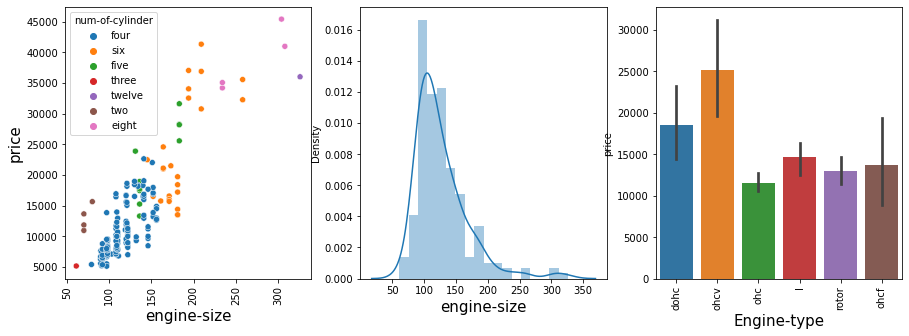

In [16]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(df["engine-size"],df["price"],hue=df["num-of-cylinder"],color="orange")
plt.xticks(rotation=90)
plt.xlabel("engine-size",fontsize=15)
plt.ylabel("price",fontsize=15)

plt.subplot(1,3,2)
sns.distplot(df["engine-size"],)
plt.xlabel("engine-size",fontsize=15)

plt.subplot(1,3,3)
sns.barplot(x=df['engine-type'],y=df['price'])
plt.xticks(rotation=90)
plt.xlabel("Engine-type",fontsize=15)
plt.show()

###### The price of cars with respect to its engine-size is positively correlated,and when we look into engine type we can find the ohcv engine type costs are predominantly high compared to other engine type. we can notice the large size of engine has more no of cylinders with respect to its cost price 

<AxesSubplot:xlabel='height', ylabel='price'>

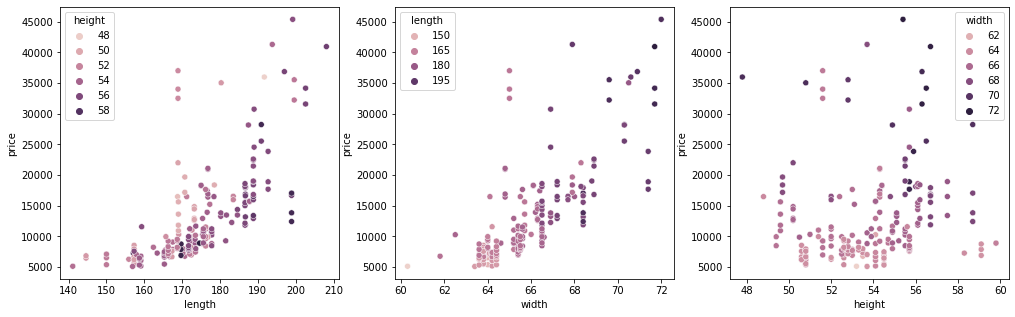

In [17]:
fig=plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.scatterplot(x="length",y="price",hue="height",data=df)
plt.subplot(1,3,2)
sns.scatterplot(x="width",y="price",hue="length",data=df)
plt.subplot(1,3,3)
sns.scatterplot(x="height",y="price",hue="width",data=df)

###### length and width are positively correlated with dependent variable and height is scatter in nature

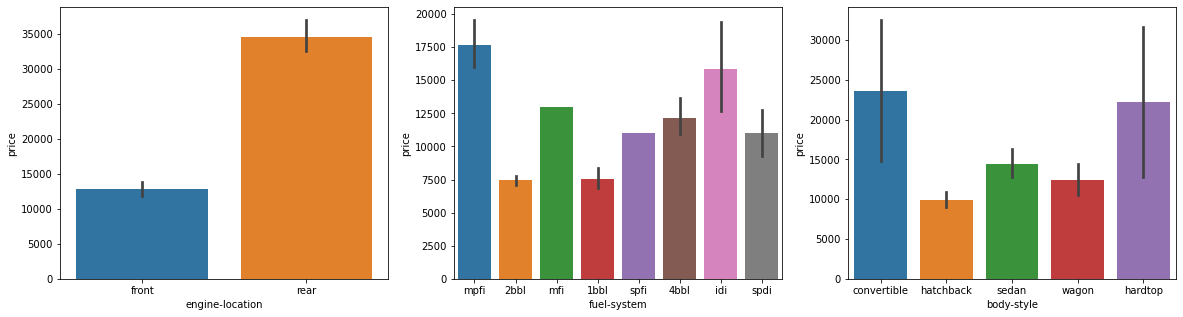

In [18]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(x=df['engine-location'],y=df['price'])
plt.subplot(1,3,2)
sns.barplot(x=df['fuel-system'],y=df['price'])
plt.subplot(1,3,3)
sns.barplot(x=df['body-style'],y=df['price'])
plt.show()

##### Price of the branded car with respect to its rear engine location are costlier than Front
##### Cost of the MPFI(multi point fuel) injection is comparitively high  
##### Based on the body style of a car against its price, we are able to vizualize that 'convertible' and 'hardtop' are costlier than  other models 

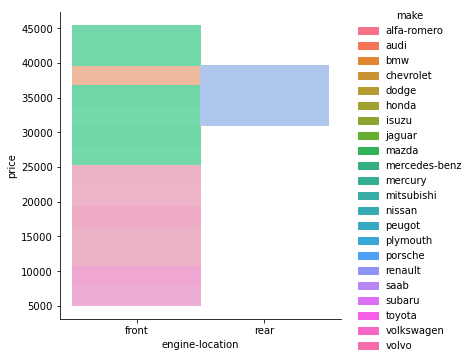

In [19]:
sns.displot(x=df['engine-location'],y=df['price'],hue=df['make'])

##### The num of cyclinders in a automobile is linearly related to the price ,because it determines the size of the engine 

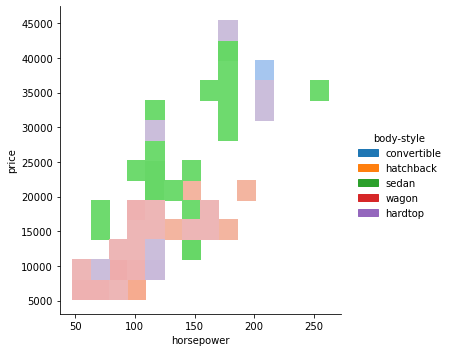

In [20]:
sns.displot(x=df['horsepower'],y=df['price'],hue=df['body-style'])

##### Horsepower, which is related in terms of measuring the engine performance of a car. most of the cars with higher horsepower falls under the category of 'Sedan ' and ' Hardtop ' body style.

Text(0.5, 0, 'highway-mpg')

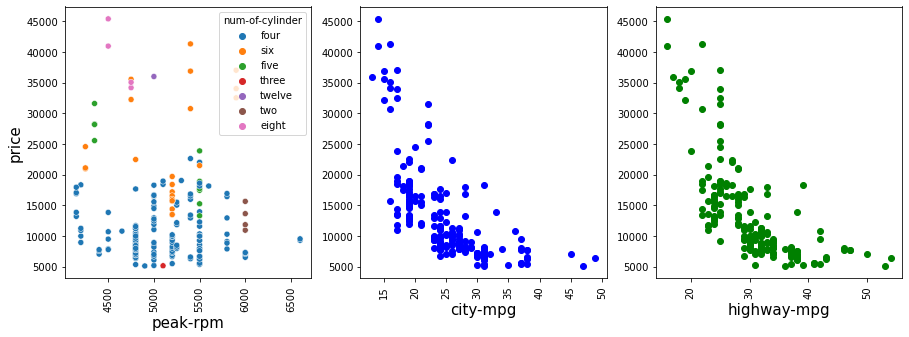

In [21]:
fig=plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(df["peak-rpm"],df["price"],df["num-of-cylinder"],color="orange")
plt.xticks(rotation=90)
plt.xlabel("peak-rpm",fontsize=15)
plt.ylabel("price",fontsize=15)

plt.subplot(1,3,2)
plt.scatter(df["city-mpg"],df["price"],color="blue")
plt.xticks(rotation=90)
plt.xlabel("city-mpg",fontsize=15)

plt.subplot(1,3,3)
plt.scatter(df["highway-mpg"],df["price"],color="green")
plt.xticks(rotation=90)
plt.xlabel("highway-mpg",fontsize=15)


#### We know that car will attain max speed with respect to rpm, within(4500-5000rpm) minimum peak-rpm car attaining max speed are usualy costly(also notice the number of cylinders that are high) and from fig(2 and 3) we can absorb both are city and highway mpg(miles per gallon) are Negetively correlated, and contributing to price Equally.

<AxesSubplot:xlabel='stroke', ylabel='price'>

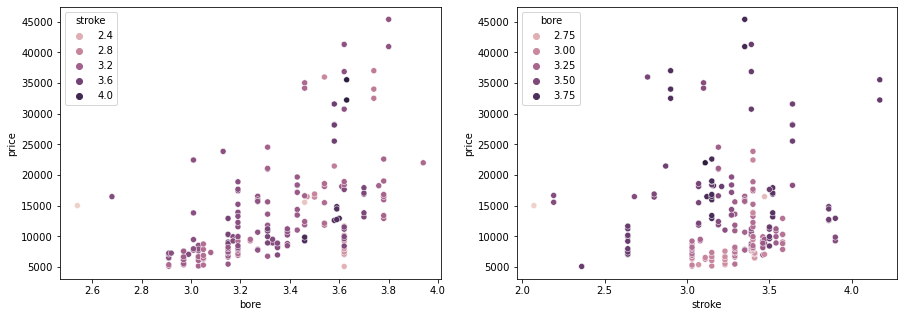

In [22]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['bore'],y=df['price'],hue=df['stroke'])
plt.subplot(1,2,2)
sns.scatterplot(x=df['stroke'],y=df['price'],hue=df['bore'])

#### Increased size w.r.t stroke and bore are directly proportionate to price 

# Data preprocessing

In [23]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinder        7
engine-size           43
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            58
peak-rpm              22
city-mpg              29
highway-mpg           30
price                185
dtype: int64

In [24]:
obj_cols=df[['engine-type','num-of-cylinder','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','fuel-system']]
for column in obj_cols.columns:
    print(obj_cols[column].value_counts())

ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: engine-type, dtype: int64
four      156
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinder, dtype: int64
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64
gas       180
diesel     20
Name: fuel-type, dtype: int64
std      164
turbo     36
Name: aspiration, dtype: int64
four    115
two      85
Name: num-of-doors, dtype: int64
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: body-style, dtype: int6

#### Encoding object type to numerical type

In [25]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df['fuel-type']= le.fit_transform(df['fuel-type'])
df['engine-location']=le.fit_transform(df['engine-location']) 
df['engine-type']= le.fit_transform(df['engine-type'])
df['make']= le.fit_transform(df['make'])
df['aspiration']= le.fit_transform(df['aspiration'])
df['num-of-doors']= le.fit_transform(df['num-of-doors'])
df['body-style']= le.fit_transform(df['body-style'])
df['num-of-cylinder']= le.fit_transform(df['num-of-cylinder'])
df['fuel-system']= le.fit_transform(df['fuel-system'])
df['drive-wheels']= le.fit_transform(df['drive-wheels'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    float64
 2   make               200 non-null    int32  
 3   fuel-type          200 non-null    int32  
 4   aspiration         200 non-null    int32  
 5   num-of-doors       200 non-null    int32  
 6   body-style         200 non-null    int32  
 7   drive-wheels       200 non-null    int32  
 8   engine-location    200 non-null    int32  
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    int32  
 15  num-of-cylinder    200 non-null    int32  
 16  engine-size        200 non

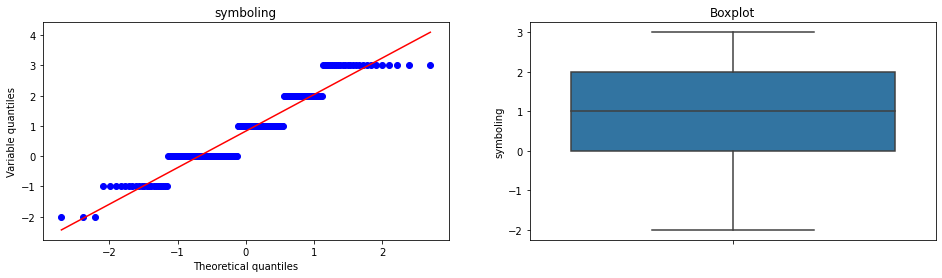

None


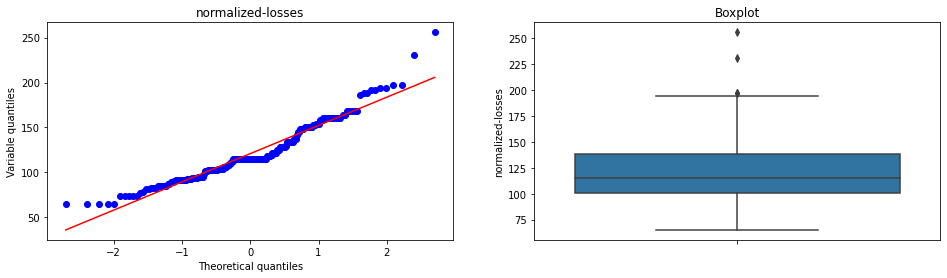

None


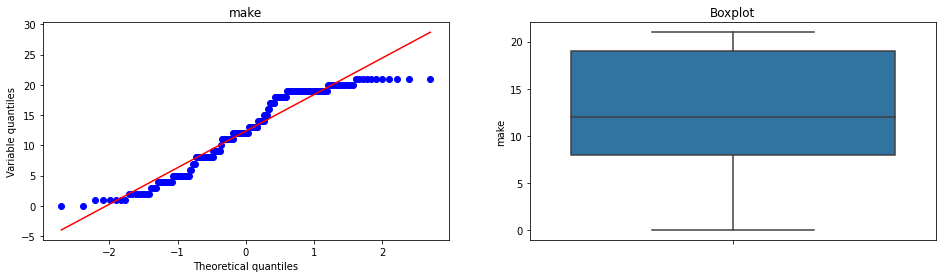

None


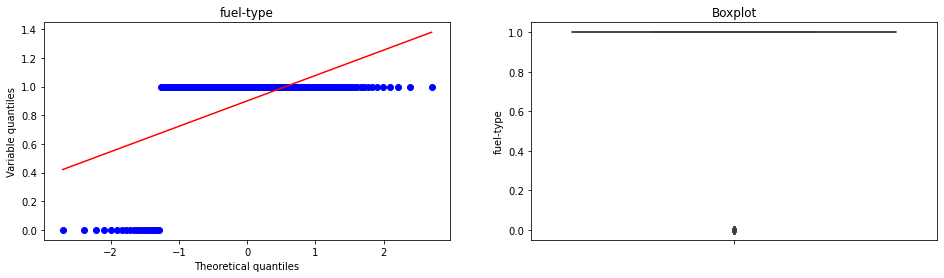

None


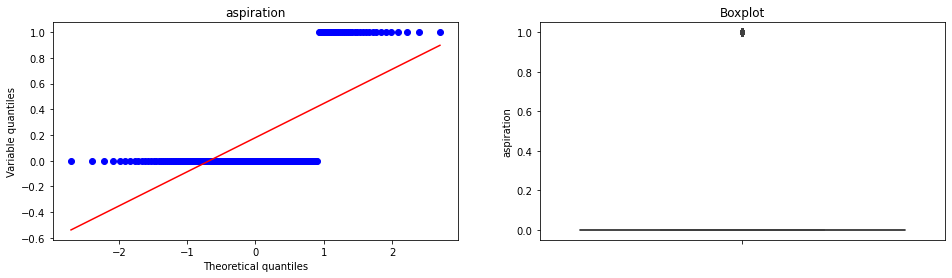

None


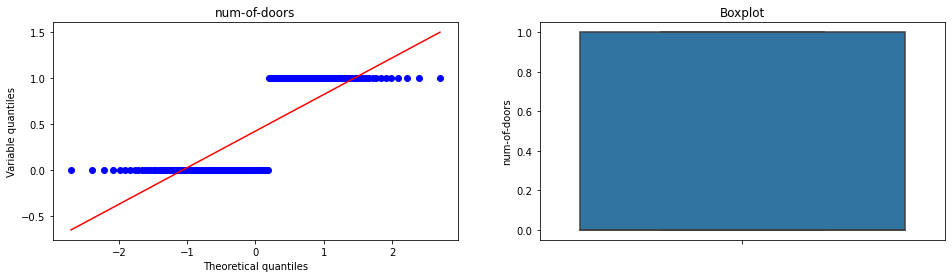

None


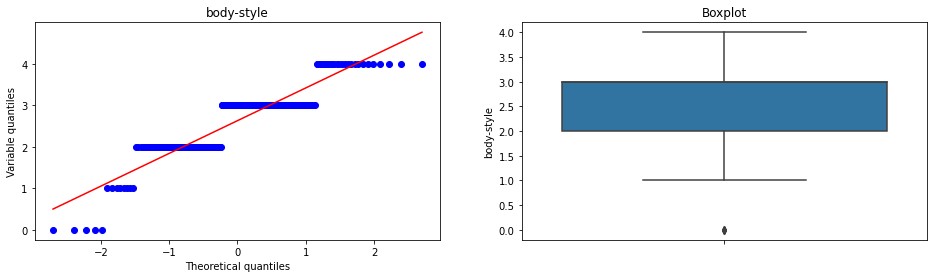

None


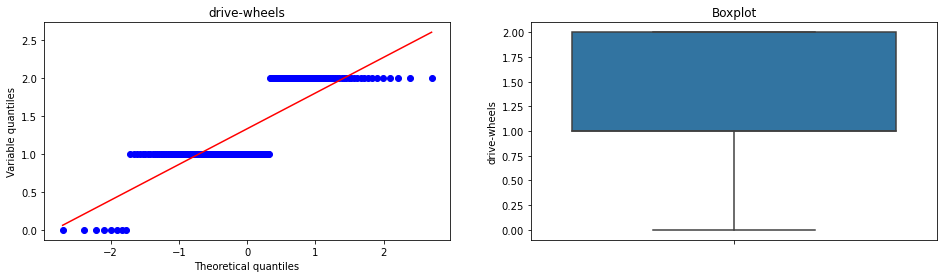

None


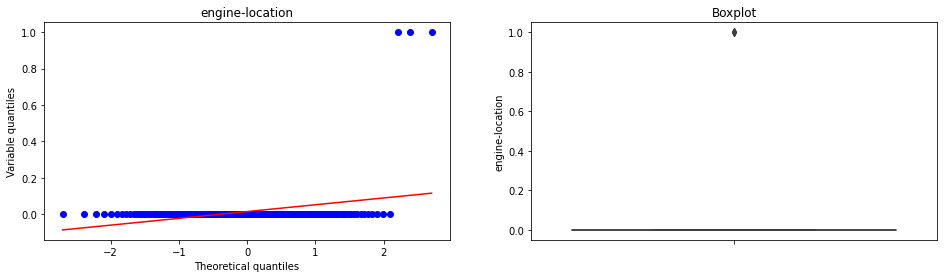

None


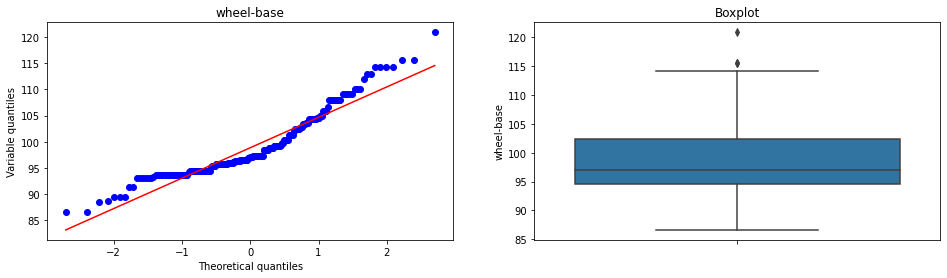

None


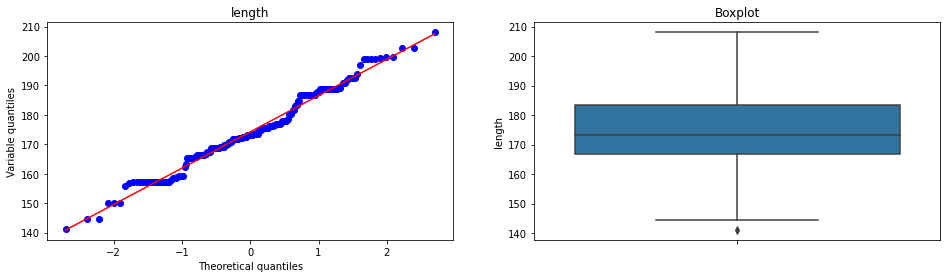

None


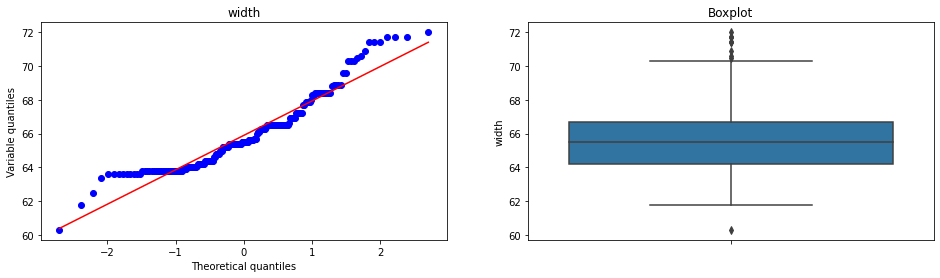

None


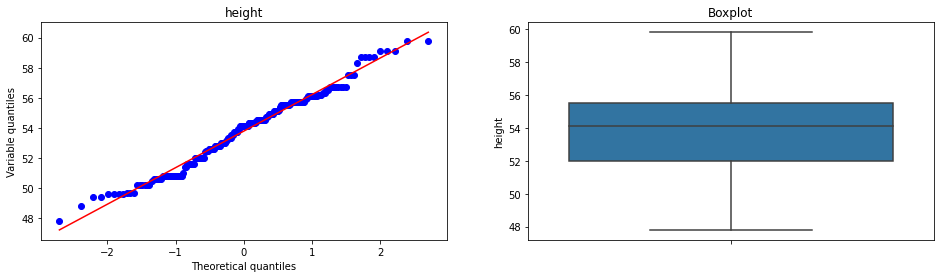

None


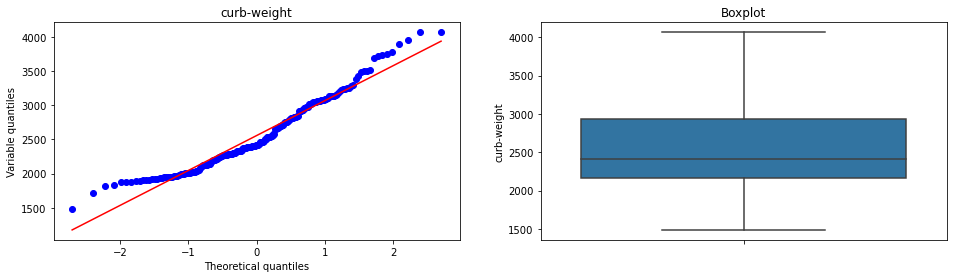

None


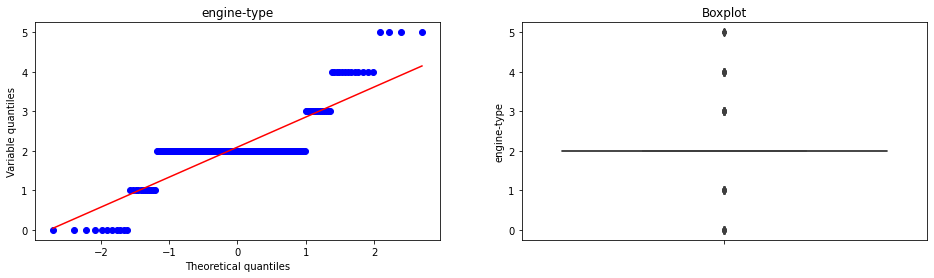

None


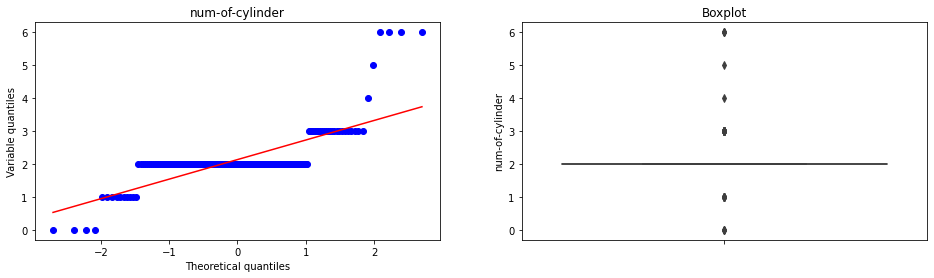

None


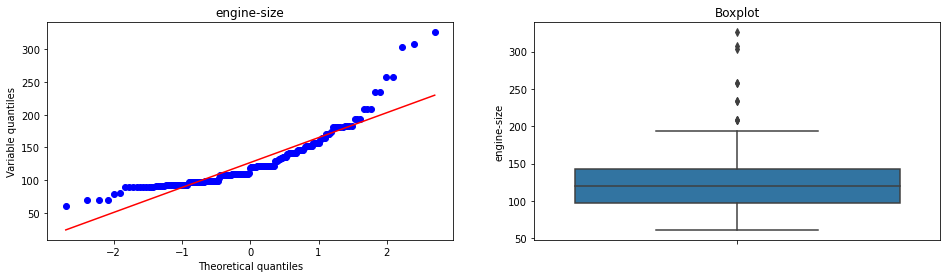

None


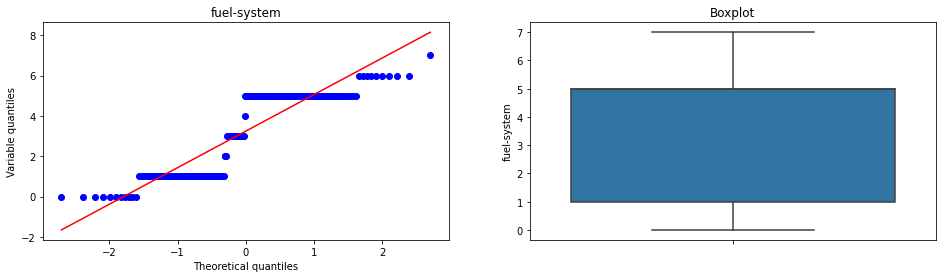

None


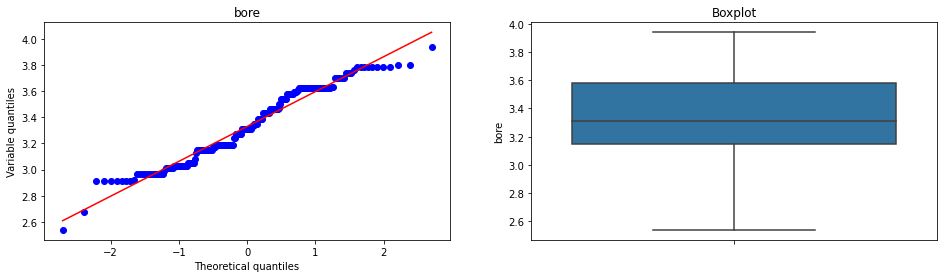

None


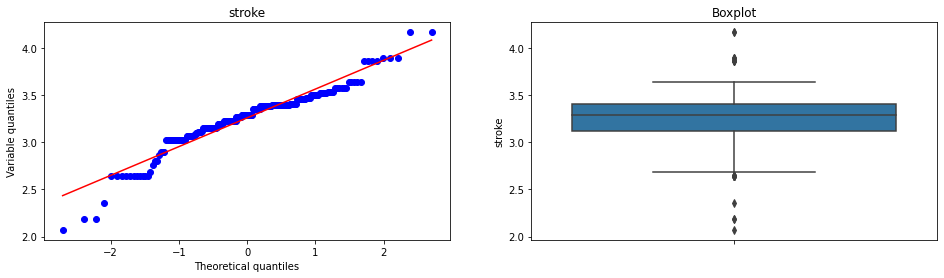

None


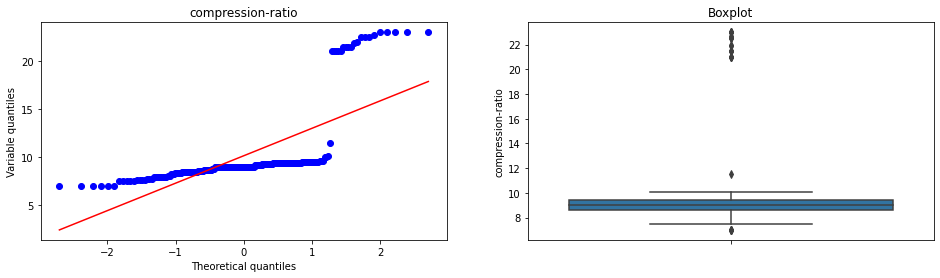

None


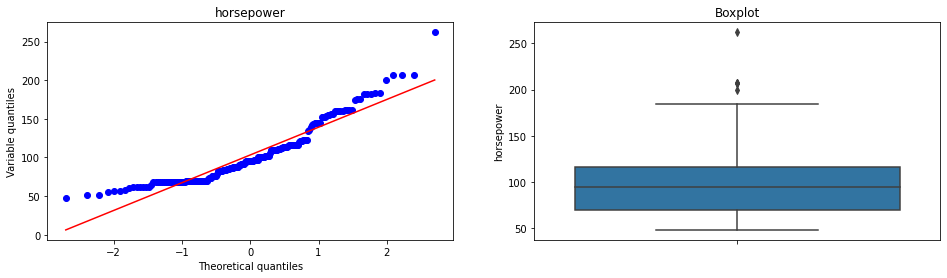

None


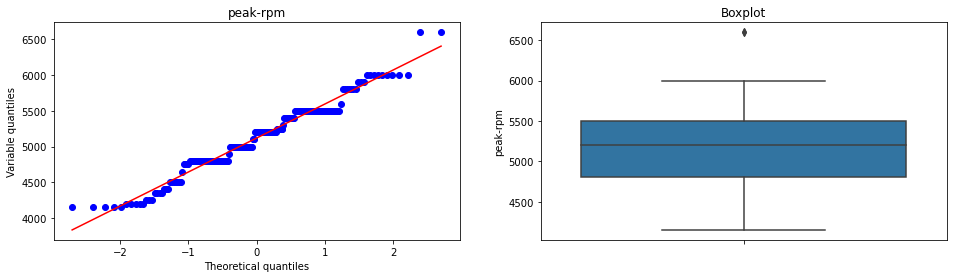

None


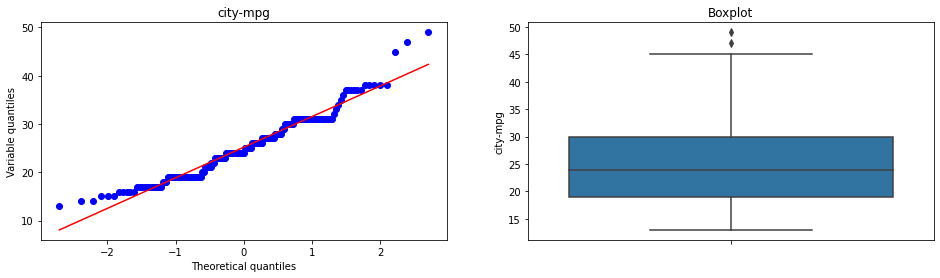

None


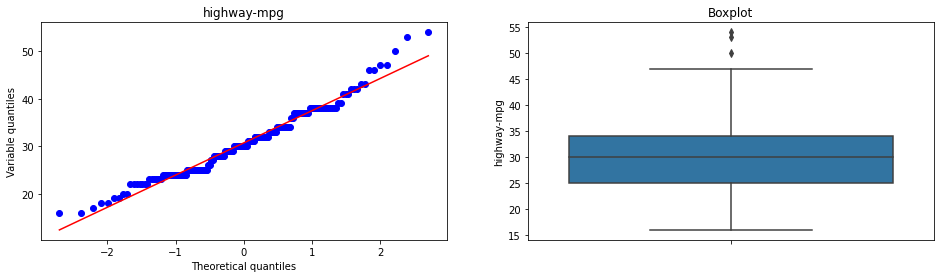

None


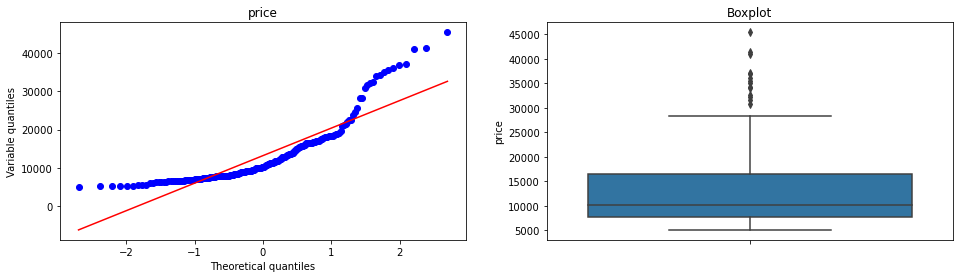

None


In [27]:
#Checking the outliers after Encodig
import scipy.stats as stats

def Outlier_plots(df, variable):

    plt.figure(figsize=(16, 4))

    plt.subplot(1,2,1)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    plt.title(variable)

    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

cols=df[['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinder','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']]
for column in cols.columns:
    print(Outlier_plots(df, column))
    

##### Checking Correlation between Variables

In [28]:
df.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.462765,-0.114606,0.195381,-0.050995,0.669595,-0.592275,-0.064238,0.215014,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,0.114252,0.202382,-0.112069,0.084915,-0.148260,0.011596,-0.181073,0.074270,0.284204,-0.030158,0.041248,-0.083327
normalized-losses,0.462765,1.000000,-0.241710,0.106304,-0.011203,0.357559,-0.254704,0.293194,-0.022060,-0.077168,-0.009513,0.061155,-0.377599,0.065385,-0.057622,0.171318,0.073660,0.200098,-0.051668,0.044772,-0.116261,0.182697,0.245735,-0.194700,-0.151379,0.094406
make,-0.114606,-0.241710,1.000000,-0.107128,0.067343,-0.136559,0.062768,-0.023192,0.052614,0.058298,0.107235,-0.013687,0.215015,0.017135,-0.069077,-0.052150,-0.084857,0.155122,0.245527,-0.227350,0.130987,-0.064516,-0.216552,0.059980,0.054335,-0.164899
fuel-type,0.195381,0.106304,-0.107128,1.000000,-0.407787,0.185431,-0.146051,-0.133643,0.041135,-0.306706,-0.210616,-0.243448,-0.281198,-0.221082,0.129716,0.120965,-0.070925,0.041473,-0.055866,-0.239350,-0.985228,0.167911,0.476878,-0.264947,-0.197989,-0.110417
aspiration,-0.050995,-0.011203,0.067343,-0.407787,1.000000,-0.060552,0.066579,0.097717,-0.057817,0.254907,0.229294,0.304459,0.086531,0.322097,-0.138284,-0.130252,0.110278,0.284986,0.229991,0.214838,0.307074,0.252865,-0.191470,-0.191068,-0.243429,0.179762
num-of-doors,0.669595,0.357559,-0.136559,0.185431,-0.060552,1.000000,-0.689305,0.109674,0.143538,-0.440101,-0.394091,-0.223877,-0.533943,-0.209132,0.124640,0.187066,-0.024613,-0.006292,-0.124437,0.021033,-0.168077,0.101663,0.234504,0.031527,0.049123,-0.042789
body-style,-0.592275,-0.254704,0.062768,-0.146051,0.066579,-0.689305,1.000000,-0.146534,-0.286910,0.393464,0.349202,0.146080,0.558940,0.149007,-0.120016,-0.067929,-0.064041,-0.042727,0.030950,-0.044144,0.133333,-0.137628,-0.111383,0.004429,-0.030283,-0.074108
drive-wheels,-0.064238,0.293194,-0.023192,-0.133643,0.097717,0.109674,-0.146534,1.000000,0.150677,0.483096,0.499947,0.489266,-0.012936,0.592919,-0.054165,0.233094,0.527523,0.433074,0.468906,0.093624,0.122370,0.548085,-0.035334,-0.467503,-0.471688,0.590292
engine-location,0.215014,-0.022060,0.052614,0.041135,-0.057817,0.143538,-0.286910,0.150677,1.000000,-0.191524,-0.053384,-0.052829,-0.111642,0.051280,0.125971,0.135919,0.199424,0.107475,0.189040,-0.141921,-0.020652,0.342513,0.201582,-0.157707,-0.103378,0.331098
wheel-base,-0.529145,-0.077168,0.058298,-0.306706,0.254907,-0.440101,0.393464,0.483096,-0.191524,1.000000,0.879005,0.814593,0.583789,0.787584,-0.166964,-0.193325,0.576779,0.392105,0.502386,0.143529,0.249689,0.376616,-0.365699,-0.480029,-0.552211,0.589147


<AxesSubplot:>

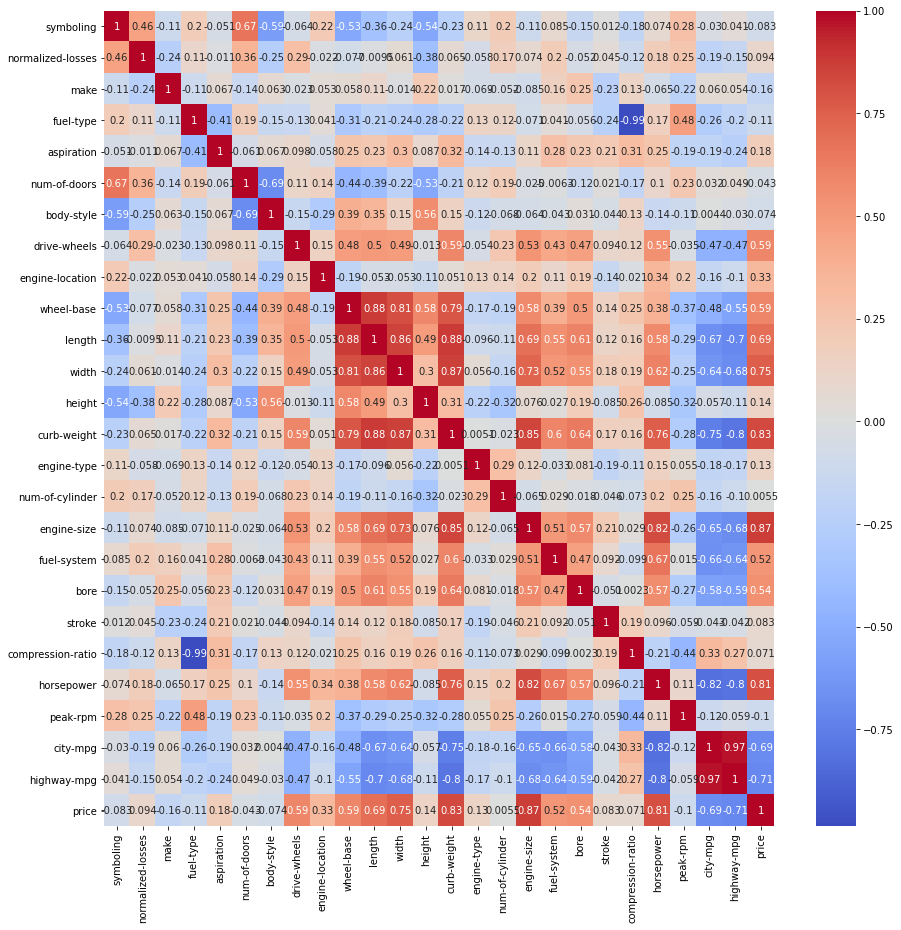

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap=plt.cm.coolwarm,annot=True)

<AxesSubplot:>

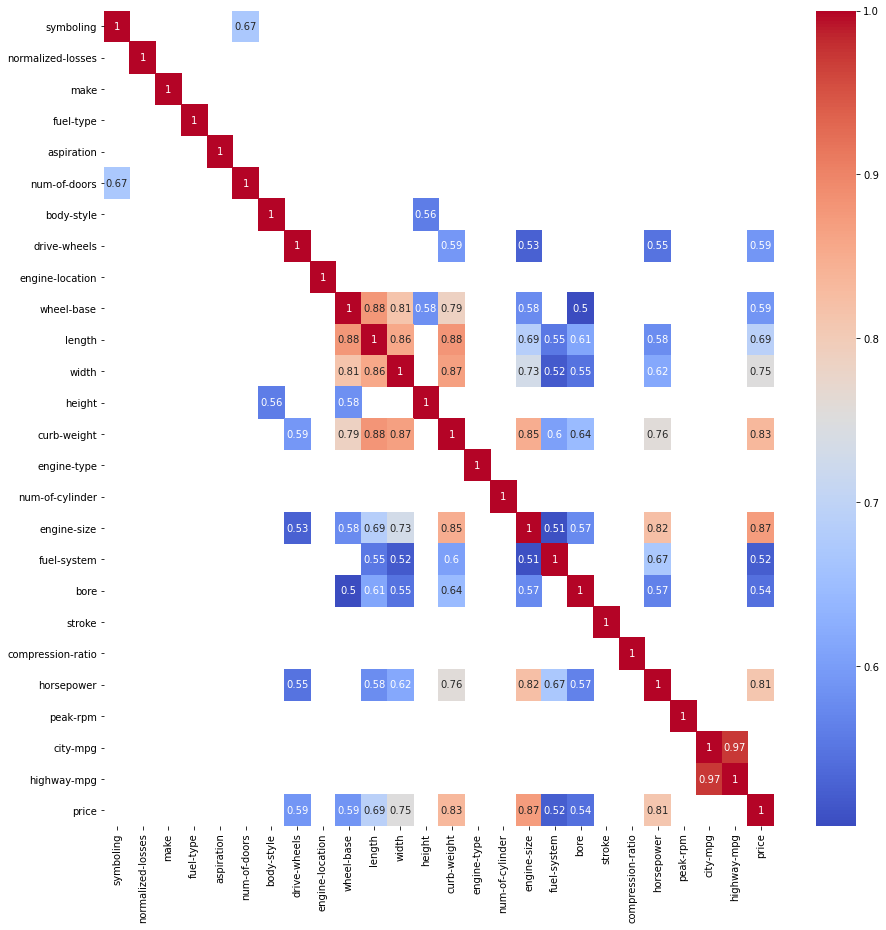

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),mask=df.corr()<=0.5,cmap=plt.cm.coolwarm,annot=True)

<AxesSubplot:>

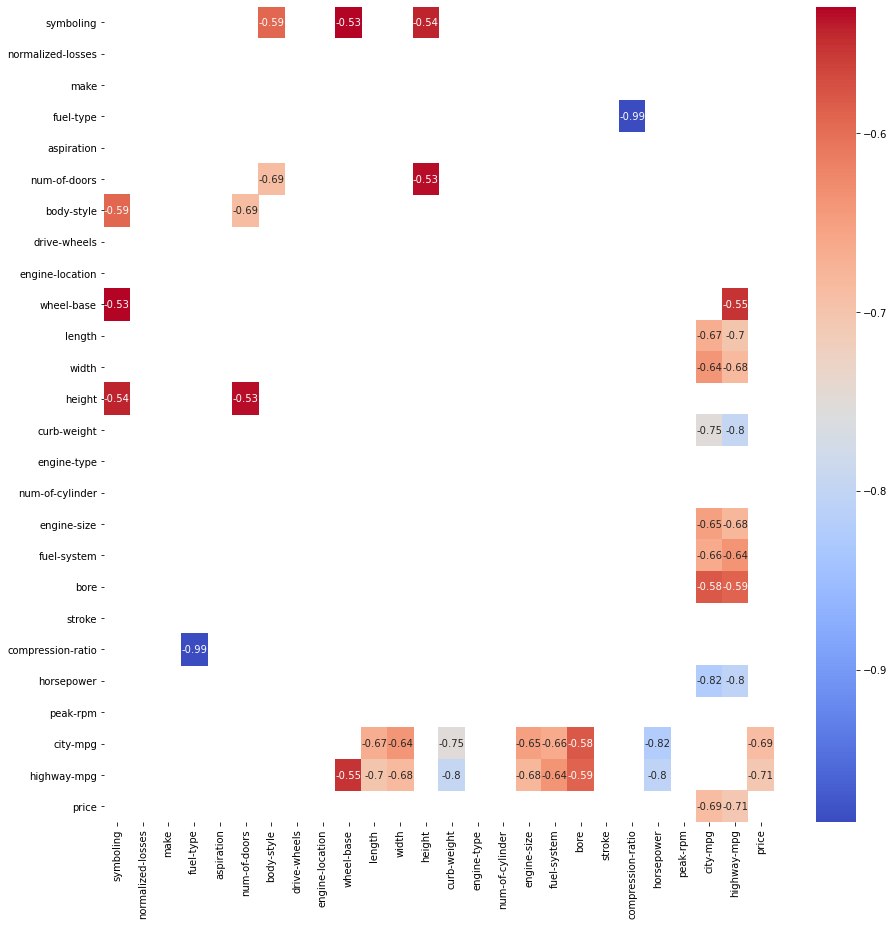

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),mask=df.corr()>=-0.5,cmap=plt.cm.coolwarm,annot=True)

# Applying Data on Models

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")

In [33]:
x=df.drop("price",axis=1)
y=df.price

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

from time import time
regressors = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    SVR(kernel="linear")
]
head = 13
for model in regressors[:head]:
    start = time()
    model.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(x_train)
    y_pred_test=model.predict(x_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred_test))
    print("\tR2 score Train:", r2_score(y_train, y_pred_train))
    print("\tR2 score Test:", r2_score(y_test, y_pred_test))

    print()

LinearRegression()
	Training time: 0.008s
	Prediction time: 0.008s
	Mean absolute error: 2252.791359257455
	R2 score Train: 0.8699312080365715
	R2 score Test: 0.8893848728907614

Lasso()
	Training time: 0.020s
	Prediction time: 0.000s
	Mean absolute error: 2248.5706220251127
	R2 score Train: 0.869892293948845
	R2 score Test: 0.8903164212171939

Ridge()
	Training time: 0.017s
	Prediction time: 0.003s
	Mean absolute error: 2348.4875558903123
	R2 score Train: 0.8665969278908943
	R2 score Test: 0.8819483823418064

KNeighborsRegressor()
	Training time: 0.016s
	Prediction time: 0.000s
	Mean absolute error: 2181.1233333333334
	R2 score Train: 0.8449578410526428
	R2 score Test: 0.8330193177472479

DecisionTreeRegressor()
	Training time: 0.014s
	Prediction time: 0.000s
	Mean absolute error: 2052.016666666667
	R2 score Train: 0.9998664219695718
	R2 score Test: 0.8913230243088514

RandomForestRegressor()
	Training time: 0.300s
	Prediction time: 0.063s
	Mean absolute error: 1222.2469999999996
	R2 

In [34]:
#Applying Scaler to perform on Linear Models and others

sts=StandardScaler()
scaled_xtrain=sts.fit_transform(x_train)
scaled_xtest=sts.transform(x_test)

regressors = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    KNeighborsRegressor()
]
head = 4
for model in regressors[:head]:
    start = time()
    model.fit(scaled_xtrain, y_train)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(scaled_xtrain)
    y_pred_test=model.predict(scaled_xtest)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred_test))
    print("\tR2 score Train:", r2_score(y_train, y_pred_train))
    print("\tR2 score Test:", r2_score(y_test, y_pred_test))

    print()

LinearRegression()
	Training time: 0.015s
	Prediction time: 0.000s
	Mean absolute error: 2252.7913592575055
	R2 score Train: 0.8699312080365712
	R2 score Test: 0.8893848728907554

Lasso()
	Training time: 0.009s
	Prediction time: 0.000s
	Mean absolute error: 2241.5237229137583
	R2 score Train: 0.8699143168350936
	R2 score Test: 0.8908427541013363

Ridge()
	Training time: 0.008s
	Prediction time: 0.002s
	Mean absolute error: 2169.9079375919914
	R2 score Train: 0.8690269365845543
	R2 score Test: 0.9022000364925905

KNeighborsRegressor()
	Training time: 0.000s
	Prediction time: 0.000s
	Mean absolute error: 2581.4133333333334
	R2 score Train: 0.8284772881199298
	R2 score Test: 0.7891853675023559



# Feature_Selection

In [35]:
from sklearn.feature_selection import RFE

###### 1. Recursive Feature Elimination Method for feature selection

In [36]:
model=RandomForestRegressor()
rfe=RFE(model,8,verbose=1)
fit=rfe.fit(x,y)
print("Num Features :{}".format(fit.n_features_))
print("Support Features :{}".format(fit.support_))
print("Feature Ranking :{}".format(fit.ranking_))

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Num Features :8
Support Features :[False  True  True False False False False False False False  True  True
 False  True False False  True False False False False  True False False
  True]
Feature Ranking :[14  1  1 15 12 16  9 11 18  2  1  1  6  1 13 17  1 10  8  7  4  1  5  3
  1]


In [37]:
rfe_ranking=pd.DataFrame(fit.ranking_)
col=pd.DataFrame(df.columns)
select=pd.concat([rfe_ranking,col],axis=1)
columns=["Ranking","Selected_RFE_Variables"]
select.columns=columns
select.loc[select["Ranking"]==1.0,:]

,Ranking,Selected_RFE_Variables
1,1.0,normalized-losses
2,1.0,make
10,1.0,length
11,1.0,width
13,1.0,curb-weight
16,1.0,engine-size
21,1.0,horsepower
24,1.0,highway-mpg


In [38]:
#RFE_best_8_feature
RFE_best_feature=df[['make','wheel-base',"width",'curb-weight','engine-size','horsepower',"city-mpg",'highway-mpg']]

##  Using 8 Selected Features from RFE Method

In [39]:
RFE_best_feature=df[['make','wheel-base',"width",'curb-weight','engine-size','horsepower',"city-mpg",'highway-mpg']]
x=RFE_best_feature
y=df.price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

regressors = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    SVR(kernel="linear")
]

head = 13
for model in regressors[:head]:
    start = time()
    model.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(x_train)
    y_pred_test=model.predict(x_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred_test))
    print("\tR2 score Train:", r2_score(y_train, y_pred_train))
    print("\tR2 score Test:", r2_score(y_test, y_pred_test))

    print()

LinearRegression()
	Training time: 0.000s
	Prediction time: 0.016s
	Mean absolute error: 2822.9484732549076
	R2 score Train: 0.8202106279456335
	R2 score Test: 0.8381129542029035

Lasso()
	Training time: 0.000s
	Prediction time: 0.010s
	Mean absolute error: 2822.355892459491
	R2 score Train: 0.8202105698053198
	R2 score Test: 0.8381465197381349

Ridge()
	Training time: 0.005s
	Prediction time: 0.002s
	Mean absolute error: 2820.8470061746457
	R2 score Train: 0.8202099281311147
	R2 score Test: 0.8382376123365747

KNeighborsRegressor()
	Training time: 0.005s
	Prediction time: 0.011s
	Mean absolute error: 2718.2300000000005
	R2 score Train: 0.7739428016046233
	R2 score Test: 0.7856981467497055

DecisionTreeRegressor()
	Training time: 0.008s
	Prediction time: 0.009s
	Mean absolute error: 1484.2666666666667
	R2 score Train: 0.9991058129492509
	R2 score Test: 0.9386604378179582

RandomForestRegressor()
	Training time: 0.334s
	Prediction time: 0.052s
	Mean absolute error: 1243.5645833333333
	R

In [40]:
#Applying Scaler For selected_features and checking with Linear Models and knn

sts=StandardScaler()
scaled_xtrain=sts.fit_transform(x_train)
scaled_xtest=sts.transform(x_test)

regressors = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    KNeighborsRegressor()
]
head = 4
for model in regressors[:head]:
    start = time()
    model.fit(scaled_xtrain, y_train)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(scaled_xtrain)
    y_pred_test=model.predict(scaled_xtest)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred_test))
    print("\tR2 score Train:", r2_score(y_train, y_pred_train))
    print("\tR2 score Test:", r2_score(y_test, y_pred_test))

    print()

LinearRegression()
	Training time: 0.014s
	Prediction time: 0.000s
	Mean absolute error: 2822.9484732549045
	R2 score Train: 0.8202106279456336
	R2 score Test: 0.8381129542029038

Lasso()
	Training time: 0.002s
	Prediction time: 0.001s
	Mean absolute error: 2822.0894378073936
	R2 score Train: 0.8202091482660572
	R2 score Test: 0.8381421793138264

Ridge()
	Training time: 0.002s
	Prediction time: 0.002s
	Mean absolute error: 2809.613054169848
	R2 score Train: 0.820129689430559
	R2 score Test: 0.8386554600278366

KNeighborsRegressor()
	Training time: 0.002s
	Prediction time: 0.006s
	Mean absolute error: 2163.87
	R2 score Train: 0.8350499555792297
	R2 score Test: 0.8273382119354646



### HyperParameterTuning using GridSearch Cv

In [41]:
#Hyperparameter Tuning on RandomForestRegressor

model=RandomForestRegressor()
params={
    'max_depth':[9,10,11,12,13,14,15],
    'n_estimators':[25,50,100,125],
    "random_state":[0,10,22,42,64,100]
}
grid=GridSearchCV(model,params,cv=3,verbose=2)
grid.fit(x,y)
print(grid.best_estimator_)

Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] END .......max_depth=9, n_estimators=25, random_state=0; total time=   0.0s
[CV] END .......max_depth=9, n_estimators=25, random_state=0; total time=   0.0s
[CV] END .......max_depth=9, n_estimators=25, random_state=0; total time=   0.0s
[CV] END ......max_depth=9, n_estimators=25, random_state=10; total time=   0.0s
[CV] END ......max_depth=9, n_estimators=25, random_state=10; total time=   0.0s
[CV] END ......max_depth=9, n_estimators=25, random_state=10; total time=   0.0s
[CV] END ......max_depth=9, n_estimators=25, random_state=22; total time=   0.0s
[CV] END ......max_depth=9, n_estimators=25, random_state=22; total time=   0.0s
[CV] END ......max_depth=9, n_estimators=25, random_state=22; total time=   0.0s
[CV] END ......max_depth=9, n_estimators=25, random_state=42; total time=   0.0s
[CV] END ......max_depth=9, n_estimators=25, random_state=42; total time=   0.0s
[CV] END ......max_depth=9, n_estimators=25, r

[CV] END .....max_depth=10, n_estimators=50, random_state=64; total time=   0.1s
[CV] END .....max_depth=10, n_estimators=50, random_state=64; total time=   0.0s
[CV] END .....max_depth=10, n_estimators=50, random_state=64; total time=   0.1s
[CV] END ....max_depth=10, n_estimators=50, random_state=100; total time=   0.1s
[CV] END ....max_depth=10, n_estimators=50, random_state=100; total time=   0.1s
[CV] END ....max_depth=10, n_estimators=50, random_state=100; total time=   0.1s
[CV] END .....max_depth=10, n_estimators=100, random_state=0; total time=   0.3s
[CV] END .....max_depth=10, n_estimators=100, random_state=0; total time=   0.2s
[CV] END .....max_depth=10, n_estimators=100, random_state=0; total time=   0.3s
[CV] END ....max_depth=10, n_estimators=100, random_state=10; total time=   0.3s
[CV] END ....max_depth=10, n_estimators=100, random_state=10; total time=   0.3s
[CV] END ....max_depth=10, n_estimators=100, random_state=10; total time=   0.2s
[CV] END ....max_depth=10, n

[CV] END ....max_depth=11, n_estimators=125, random_state=22; total time=   0.4s
[CV] END ....max_depth=11, n_estimators=125, random_state=22; total time=   0.3s
[CV] END ....max_depth=11, n_estimators=125, random_state=22; total time=   0.3s
[CV] END ....max_depth=11, n_estimators=125, random_state=42; total time=   0.3s
[CV] END ....max_depth=11, n_estimators=125, random_state=42; total time=   0.3s
[CV] END ....max_depth=11, n_estimators=125, random_state=42; total time=   0.4s
[CV] END ....max_depth=11, n_estimators=125, random_state=64; total time=   0.3s
[CV] END ....max_depth=11, n_estimators=125, random_state=64; total time=   0.3s
[CV] END ....max_depth=11, n_estimators=125, random_state=64; total time=   0.3s
[CV] END ...max_depth=11, n_estimators=125, random_state=100; total time=   0.3s
[CV] END ...max_depth=11, n_estimators=125, random_state=100; total time=   0.4s
[CV] END ...max_depth=11, n_estimators=125, random_state=100; total time=   0.4s
[CV] END ......max_depth=12,

[CV] END ......max_depth=13, n_estimators=50, random_state=0; total time=   0.1s
[CV] END ......max_depth=13, n_estimators=50, random_state=0; total time=   0.1s
[CV] END ......max_depth=13, n_estimators=50, random_state=0; total time=   0.1s
[CV] END .....max_depth=13, n_estimators=50, random_state=10; total time=   0.0s
[CV] END .....max_depth=13, n_estimators=50, random_state=10; total time=   0.1s
[CV] END .....max_depth=13, n_estimators=50, random_state=10; total time=   0.0s
[CV] END .....max_depth=13, n_estimators=50, random_state=22; total time=   0.0s
[CV] END .....max_depth=13, n_estimators=50, random_state=22; total time=   0.0s
[CV] END .....max_depth=13, n_estimators=50, random_state=22; total time=   0.1s
[CV] END .....max_depth=13, n_estimators=50, random_state=42; total time=   0.1s
[CV] END .....max_depth=13, n_estimators=50, random_state=42; total time=   0.1s
[CV] END .....max_depth=13, n_estimators=50, random_state=42; total time=   0.1s
[CV] END .....max_depth=13, 

[CV] END ....max_depth=14, n_estimators=100, random_state=64; total time=   0.2s
[CV] END ....max_depth=14, n_estimators=100, random_state=64; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=100, random_state=64; total time=   0.2s
[CV] END ...max_depth=14, n_estimators=100, random_state=100; total time=   0.3s
[CV] END ...max_depth=14, n_estimators=100, random_state=100; total time=   0.3s
[CV] END ...max_depth=14, n_estimators=100, random_state=100; total time=   0.3s
[CV] END .....max_depth=14, n_estimators=125, random_state=0; total time=   0.4s
[CV] END .....max_depth=14, n_estimators=125, random_state=0; total time=   0.3s
[CV] END .....max_depth=14, n_estimators=125, random_state=0; total time=   0.4s
[CV] END ....max_depth=14, n_estimators=125, random_state=10; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=125, random_state=10; total time=   0.3s
[CV] END ....max_depth=14, n_estimators=125, random_state=10; total time=   0.3s
[CV] END ....max_depth=14, n

In [42]:
model=RandomForestRegressor(max_depth=15, n_estimators=50, random_state=22)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,cv=3,scoring='r2')
print(scores)
print("Average_r2_score:",scores.mean())
print("Std :",scores.std())

[0.85456847 0.70305968 0.80317284]
Average_r2_score: 0.7869336624024966
Std : 0.06291004769349326


#### Since we are getting Std greater than 0.05, we are not choosing hyperparameters recomended by GridSearhCV
#### RandomForestRegressor using GridSearchCv Hyperparameters


In [43]:

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
start = time()
pr1=rfr.predict(x_train)
train_time = time() - start
print("\tTrain_time",train_time)
start = time()
pr2=rfr.predict(x_test)
predict_time = time()-start 
print("\tPrediction_time",predict_time)
print("\tMean absolute error:", mean_absolute_error(y_test, pr2))
print("\tMean Squared error:", mean_squared_error(y_test, pr2))
rmse=mean_squared_error(y_test, pr2)
from math import sqrt
print("\tRMSE-->",sqrt(rmse))
print("\tR2_score_train:",r2_score(y_train,pr1))
print("\tR2_score_test:",r2_score(y_test,pr2))
R2=r2_score(pr2,y_test)
adjusted_r2 = 1-(1-R2)*(60-1)/(60-8-1)
print("\tAdjusted_r2_score-->",adjusted_r2)

	Train_time 0.03177309036254883
	Prediction_time 0.03313040733337402
	Mean absolute error: 1239.0564166666663
	Mean Squared error: 3152522.3171729157
	RMSE--> 1775.534375103145
	R2_score_train: 0.9816289152706716
	R2_score_test: 0.9651876040290508
	Adjusted_r2_score--> 0.9559258067320765


# Conclusion

###### In terms of working Theory, looking into Scores and Time, we choose RandomForestRegressor, which will work best for the given Dataset
	Train_time 0.047972679138183594
	Prediction_time 0.04645562171936035
	Mean absolute error: 1301.3865
	Mean Squared error: 3345330.630725834
	RMSE--> 1829.0245024946587
	R2_score 0.980824926166575
	R2_score_test 0.9630584773544093
	Adjusted_r2_score--> 0.9507265691135519

#####  Optional :- We can understand that the  performance  of  linear models  before scalling and after scaling the data are giving the significant r2_scores.

### The model is also well evident that it works better with the less number of features(8),when compared to its working on all variables, so that here we reduced the complexity of the model and got the result which is efficient to determine te Price of the Car.